# Set Up/Imports

In [50]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt 

## Load landscape

In [52]:
use_model = "unedited"
use_model = "good_edit"
use_model = "bad_edit"
n_data = 128
STEPS = 21
DIST = 1
SEED = 543

data_matrix_file = f"loss_landscape_files/data_matrix_{use_model}_random_data_{n_data}_steps_{STEPS}_distance_{DIST}_seed_{SEED}.npy"
data_matrix = np.load(data_matrix_file)
print(data_matrix.shape)

(21, 21)


## plotting

In [53]:
# plt.contour(data_matrix, levels=50)
# plt.title(f'Loss Contours around Trained Model ({use_model})')
# plt.show()

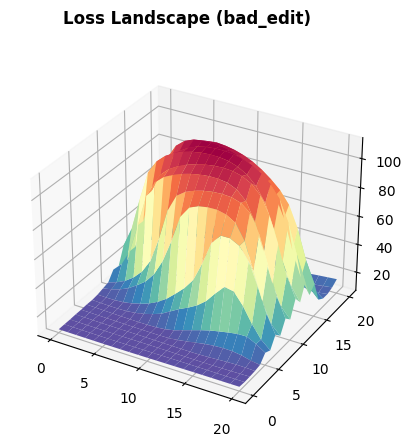

In [54]:
fig = plt.figure()
ax = plt.axes(projection='3d')
X = np.array([[j for j in range(STEPS)] for i in range(STEPS)])
Y = np.array([[i for _ in range(STEPS)] for i in range(STEPS)])
ax.plot_surface(X, Y, data_matrix, rstride=1, cstride=1, cmap='Spectral_r', edgecolor='none')
# ax.set_title(f'Surface Plot of Loss Landscape ({use_model})')
plt.suptitle(f'Loss Landscape ({use_model})', fontweight="bold")
fig.show()

[-0.5  -0.45 -0.4  -0.35 -0.3  -0.25 -0.2  -0.15 -0.1  -0.05  0.    0.05
  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5 ]
[-0.5  -0.45 -0.4  -0.35 -0.3  -0.25 -0.2  -0.15 -0.1  -0.05  0.    0.05
  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5 ]
[+] loss_landscape_files/loss_landscape_bad_edit_random_data_128_steps_21_distance_1_seed_543.png


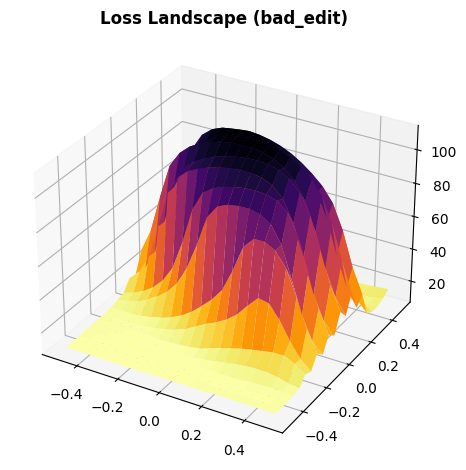

In [55]:
# for creating a responsive plot 
# %matplotlib widget

# importing required libraries 
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt 

fig = plt.figure()

# Reshape the data_matrix into a 41x41 grid for plotting
Z = data_matrix.reshape((STEPS, STEPS))

# Generate X and Y coordinates (41x41 grid)
# x = np.linspace(0, STEPS-1, STEPS)  
# y = np.linspace(0, STEPS-1, STEPS)
x = np.linspace(-DIST/2, DIST/2, STEPS)  
y = np.linspace(-DIST/2, DIST/2, STEPS)
print(x)
print(y)
X, Y = np.meshgrid(x, y)

ax = fig.add_subplot(111, projection='3d')
# Plot the 3D surface with filled colors
surf = ax.plot_surface(X, Y, Z, cmap='inferno_r', edgecolor='none')

# Add a color bar for reference
# fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Set labels
# plt.xticks(fontsize=8)
# plt.yticks(fontsize=8)

# ax.set_xlabel('$\delta_{1}$', fontsize=18, fontweight="bold")
# ax.set_ylabel('$\delta_{2}$', fontsize=18, fontweight="bold")
# ax.set_zlabel('Loss', fontsize=18, rotation=90)

ax.set_title(f'Loss Landscape ({use_model})', fontweight="bold")

plt.tight_layout()

save_as_png = f"loss_landscape_files/loss_landscape_{use_model}_random_data_{n_data}_steps_{STEPS}_distance_{DIST}_seed_{SEED}.png"
plt.savefig(save_as_png, dpi=600)
print(f"[+] {save_as_png}")
      
plt.show()


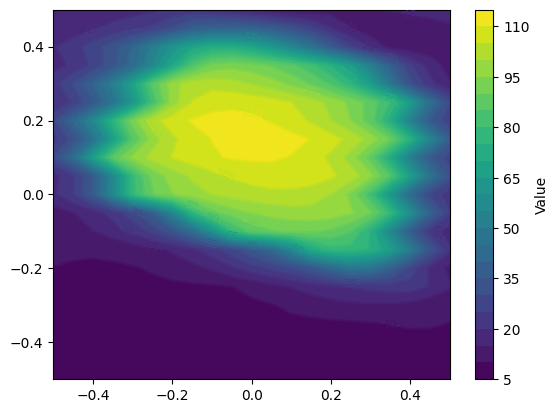

In [56]:
fig, ax = plt.subplots()

# Plot the contour map with your data
contour = ax.contour(
    X, Y, Z, levels=20, cmap="viridis"
)  # You can adjust the number of levels and colormap
ax.clabel(contour, inline=True, fontsize=8)

# Optional: Use contourf to fill the contours
contour_filled = ax.contourf(X, Y, Z, levels=20, cmap='viridis')

# Add a color bar for reference
# fig.colorbar(contour, ax=ax)
cbar = fig.colorbar(contour_filled, ax=ax)
cbar.ax.set_ylabel("Value")

plt.show()

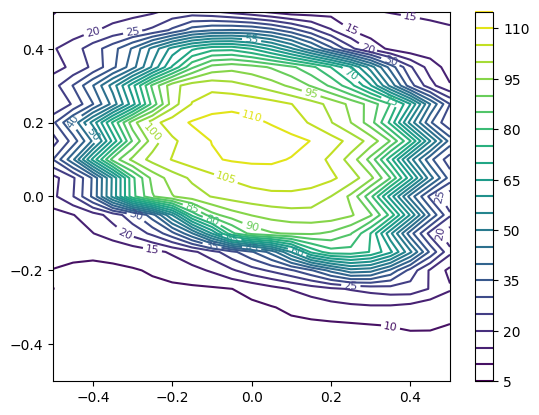

In [57]:
fig, ax = plt.subplots()

# Plot the contour map with your data
contour = ax.contour(
    X, Y, Z, levels=20, cmap="viridis"
)  # You can adjust the number of levels and colormap
ax.clabel(contour, inline=True, fontsize=8)


# Add a color bar for reference
fig.colorbar(contour, ax=ax)

plt.show()